In [100]:
import numpy as np
import matplotlib.pyplot as plt
# from math import erf
from matplotlib.lines import Line2D
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from scipy.special import erf
from scipy.special import erfinv
from numpy import log, pi,sqrt, exp,cos,sin,tan,argpartition,copy,trapz,mean,cov,vstack,hstack

In [101]:
systematic_map  = {
    'RSD': 'fiducial',
    'LRG': '+LRG vsmear',
    'QSO': '+QSO vsmear',
    '1%CATAS': '+1%vcatas',
    '5%CATAS': '+5%vcatas'
    }
label_fontsize = 12
legend_fontsize = 16

def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, type, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/{type}/{r_pk}_z{redshift}'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        if type == 'fiducial':
            realisation=np.loadtxt(Ddir+f'/pk/{catalogue}_{h}_z{redshift}.pk')
        elif type == 'cross_pkl':
            realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        elif type == 'auto_pkl':
            realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

/Users/alain/Desktop/projectNU/main/data/kbin2/cross_pkl/1%CATAS_z0.5/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/cross_pkl/5%CATAS_z0.5/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/cross_pkl/1%CATAS_z1.0/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/cross_pkl/5%CATAS_z1.0/fiducial_199_z1.0.pk


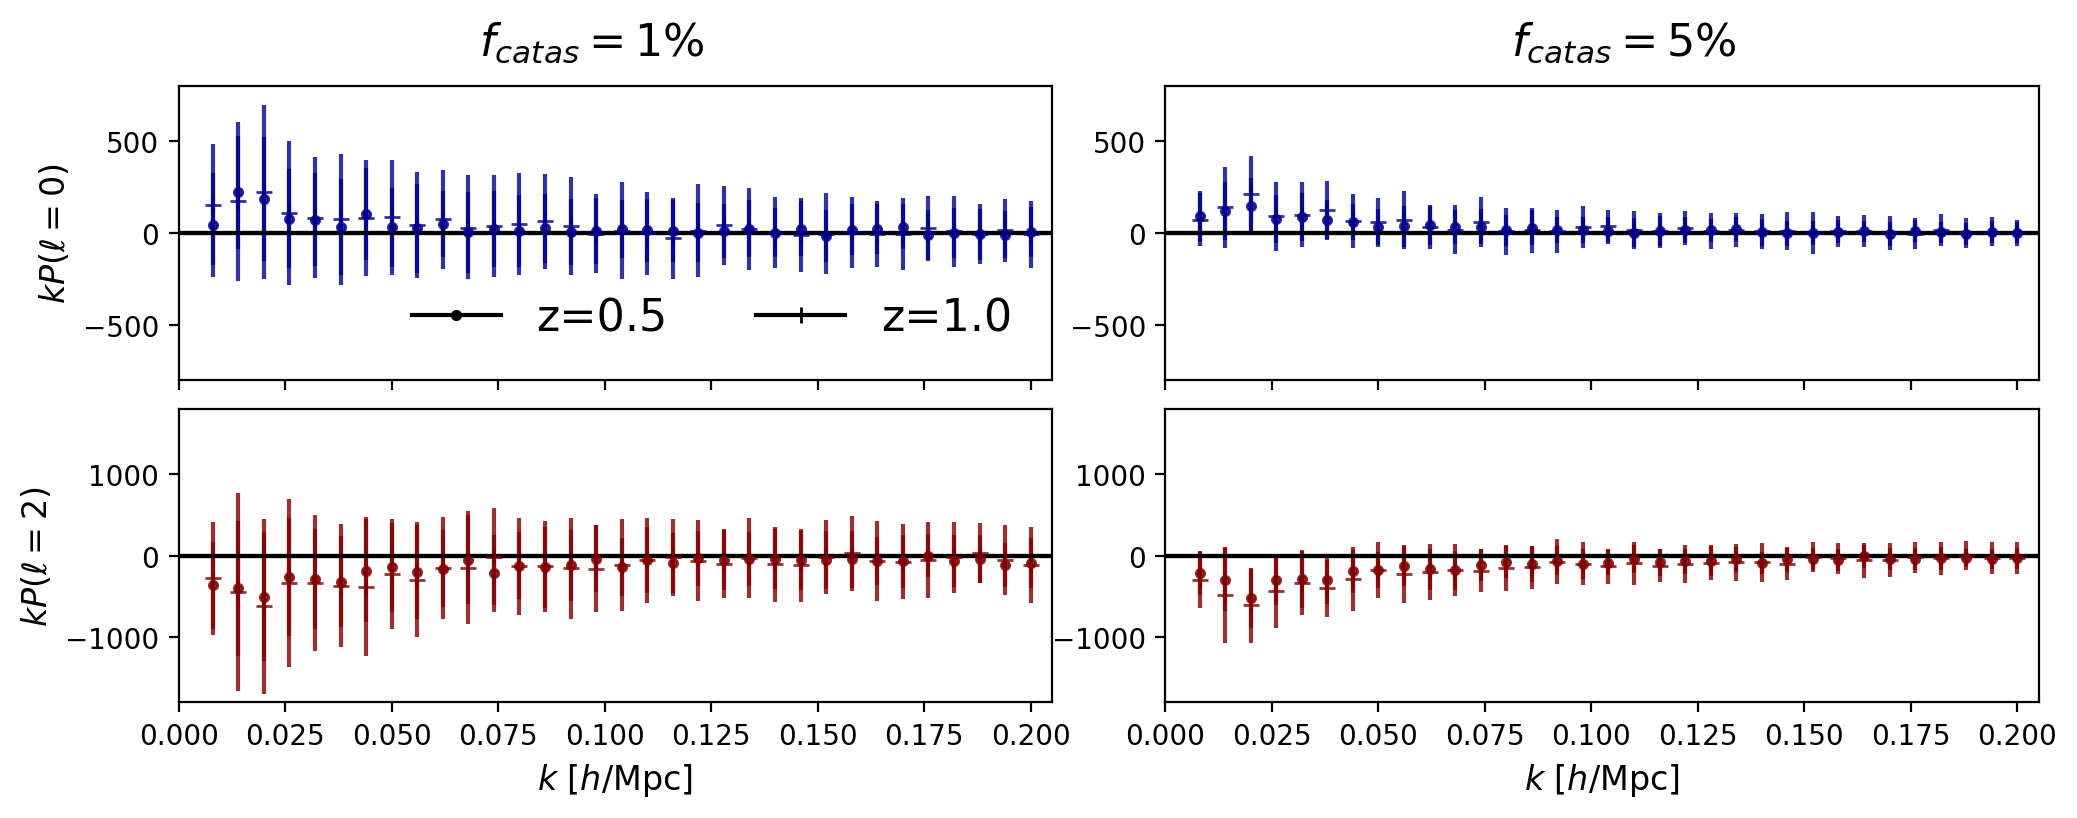

In [22]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize = (12, 4))
fig.subplots_adjust(wspace=0.13)
fig.subplots_adjust(hspace=0.1)

colors = ['darkblue', 'maroon']
fmts = ['.','+']

for z, redshift in enumerate([0.5, 1.0]):
    Pkobs   = []
    labels  = []
    for t,r_pk in enumerate(['1%CATAS','5%CATAS']):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload('fiducial', 'cross_pkl', r_pk, redshift)
        Pkobs.append([pk0, pk2])
        labels.append(f'obs {systematic}')
        if t == 0:
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]
    for ell, i in zip(['monopole','quadrupole'],range(2)):
        for t in range(2):
            axs[i][t].errorbar(k_ev, k_ev*(Pkobs[t][i][0]), k_ev*Pkobs[t][i][1],
                            color = colors[i], label = labels[t], fmt=fmts[z], alpha = 0.8)
            axs[i][t].axhline(0, color='k', linestyle='-', alpha=1.0)
            axs[1][t].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
            axs[0][0].set_ylabel(r'$kP(\ell=0)$', fontsize = label_fontsize)
            axs[1][0].set_ylabel(r'$kP(\ell=2)$', fontsize = label_fontsize)
            axs[i][t].set_xlim([0.0,0.205])

axs[0][0].set_ylim([-1600/2, 1600/2])
axs[1][0].set_ylim([-3600/2, 3600/2])
axs[0][1].set_ylim([-1600/2, 1600/2])
axs[1][1].set_ylim([-3600/2, 3600/2])

plt.figtext(0.25, 0.92, r'$f_{catas}=1\%$', fontsize=legend_fontsize)
plt.figtext(0.68, 0.92, r'$f_{catas}=5\%$', fontsize=legend_fontsize)

line1= Line2D([0], [0], label='z=0.5', color='black', marker='.')
line2 = Line2D([0], [0], label='z=1.0', color='black', marker='+')
leg1 = axs[0][0].legend(handles=[line1,line2], loc=4, ncols=2, fontsize=legend_fontsize)
leg1.get_frame().set_linewidth(0.0)
# leg1 = axs[0][1].legend(handles=[line1,line2], loc=4, ncols=2, fontsize=legend_fontsize)
# leg1.get_frame().set_linewidth(0.0)
plt.show()

/Users/alain/Desktop/projectNU/main/data/kbin2/auto_pkl/1%CATAS_z0.5/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/auto_pkl/5%CATAS_z0.5/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/auto_pkl/1%CATAS_z1.0/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/auto_pkl/5%CATAS_z1.0/fiducial_199_z1.0.pk


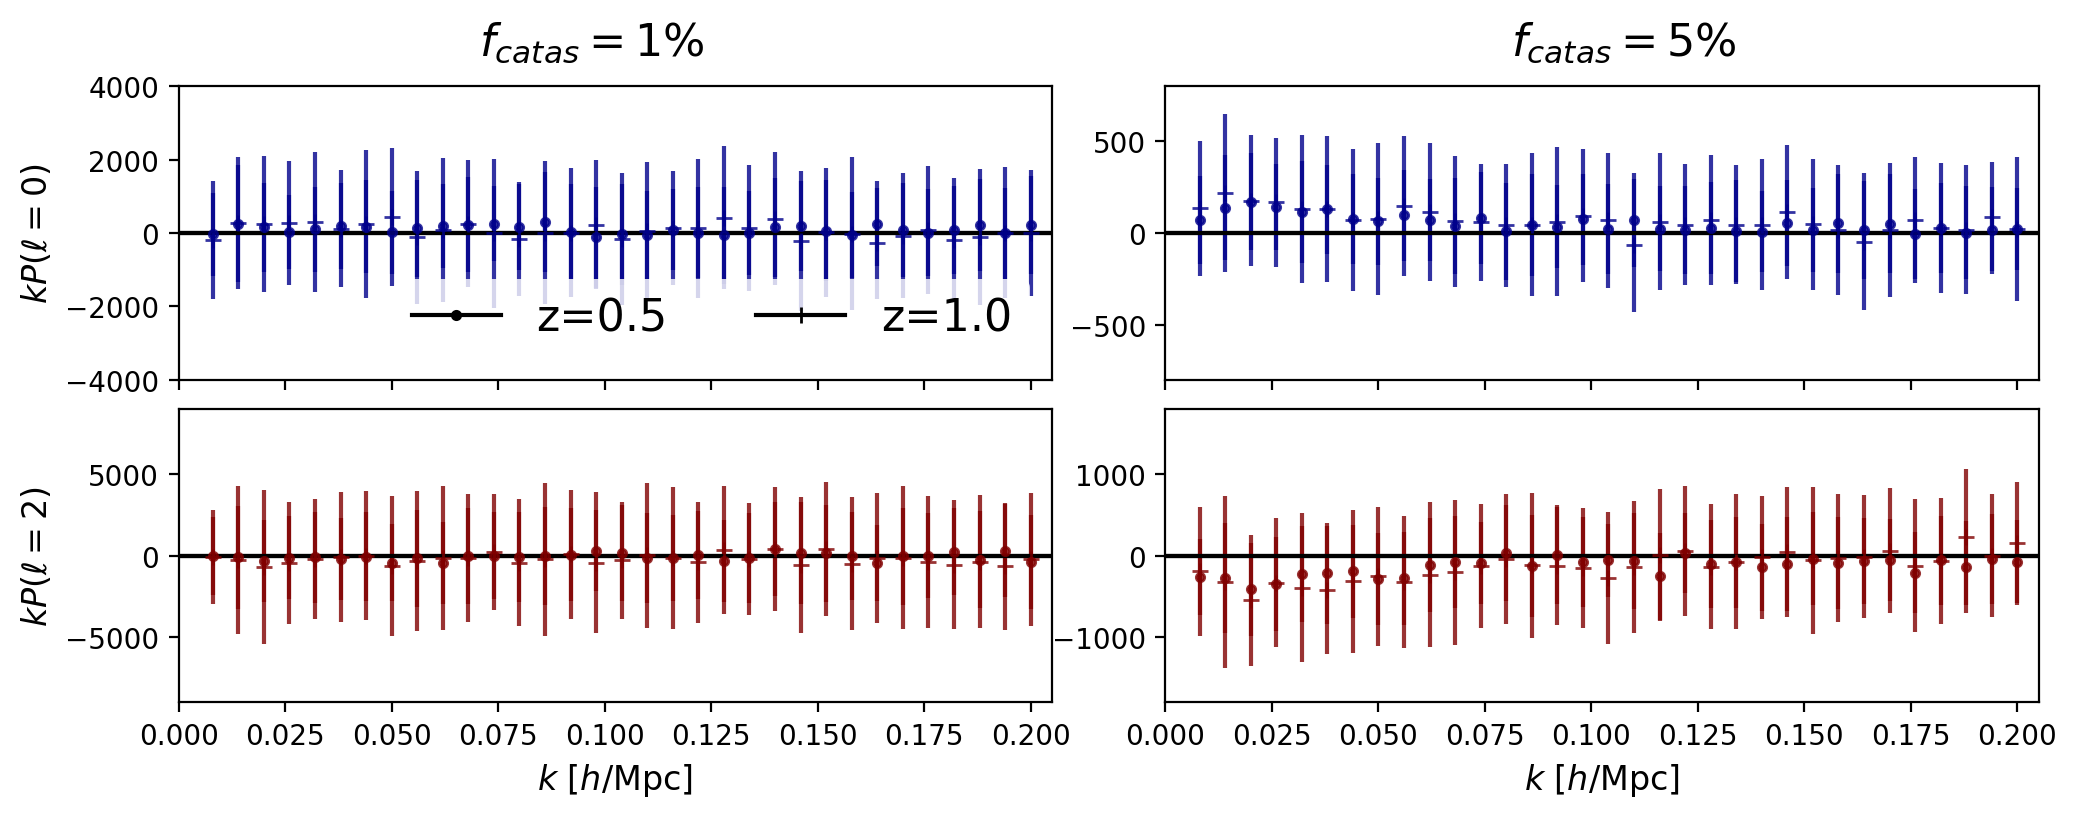

In [23]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize = (12, 4))
fig.subplots_adjust(wspace=0.13)
fig.subplots_adjust(hspace=0.1)

colors = ['darkblue', 'maroon']
fmts = ['.','+']

for z, redshift in enumerate([0.5,1.0]):
    Pkobs   = []
    labels  = []
    for t,r_pk in enumerate(['1%CATAS', '5%CATAS']):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload('fiducial', 'auto_pkl', r_pk, redshift)
        Pkobs.append([pk0, pk2])
        labels.append(f'obs {systematic}')
        if t == 0:
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]
    for ell, i in zip(['monopole','quadrupole'],range(2)):
        for t in range(2):
            axs[i][t].errorbar(k_ev, k_ev*(Pkobs[t][i][0]), k_ev*Pkobs[t][i][1],
                            color = colors[i], label = labels[t], fmt=fmts[z], alpha = 0.8)
            axs[i][t].axhline(0, color='k', linestyle='-', alpha=1.0)
            axs[1][t].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
            axs[0][0].set_ylabel(r'$kP(\ell=0)$', fontsize = label_fontsize)
            axs[1][0].set_ylabel(r'$kP(\ell=2)$', fontsize = label_fontsize)
            axs[i][t].set_xlim([0.0,0.205])

axs[0][0].set_ylim([-1600*5/2, 1600*5/2])
axs[1][0].set_ylim([-3600*5/2, 3600*5/2])
axs[0][1].set_ylim([-1600/2, 1600/2])
axs[1][1].set_ylim([-3600/2, 3600/2])

plt.figtext(0.25, 0.92, r'$f_{catas}=1\%$', fontsize=legend_fontsize)
plt.figtext(0.68, 0.92, r'$f_{catas}=5\%$', fontsize=legend_fontsize)

line1= Line2D([0], [0], label='z=0.5', color='black', marker='.')
line2 = Line2D([0], [0], label='z=1.0', color='black', marker='+')
leg1 = axs[0][0].legend(handles=[line1,line2], loc=4, ncols=2, fontsize=legend_fontsize)
leg1.get_frame().set_linewidth(0.0)
# leg1 = axs[0][1].legend(handles=[line1,line2], loc=4, ncols=2, fontsize=legend_fontsize)
# leg1.get_frame().set_linewidth(0.0)
plt.show()

/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/fiducial_199_z1.0.pk
[0.008 0.014 0.02  0.026 0.032 0.038 0.044 0.05  0.056 0.062 0.068 0.074
 0.08  0.086 0.092 0.098 0.104 0.11  0.116 0.122 0.128 0.134 0.14  0.146
 0.152 0.158 0.164 0.17  0.176 0.182 0.188 0.194 0.2  ]
/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/1%CATAS_z1.0/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/5%CATAS_z1.0/fiducial_199_z1.0.pk


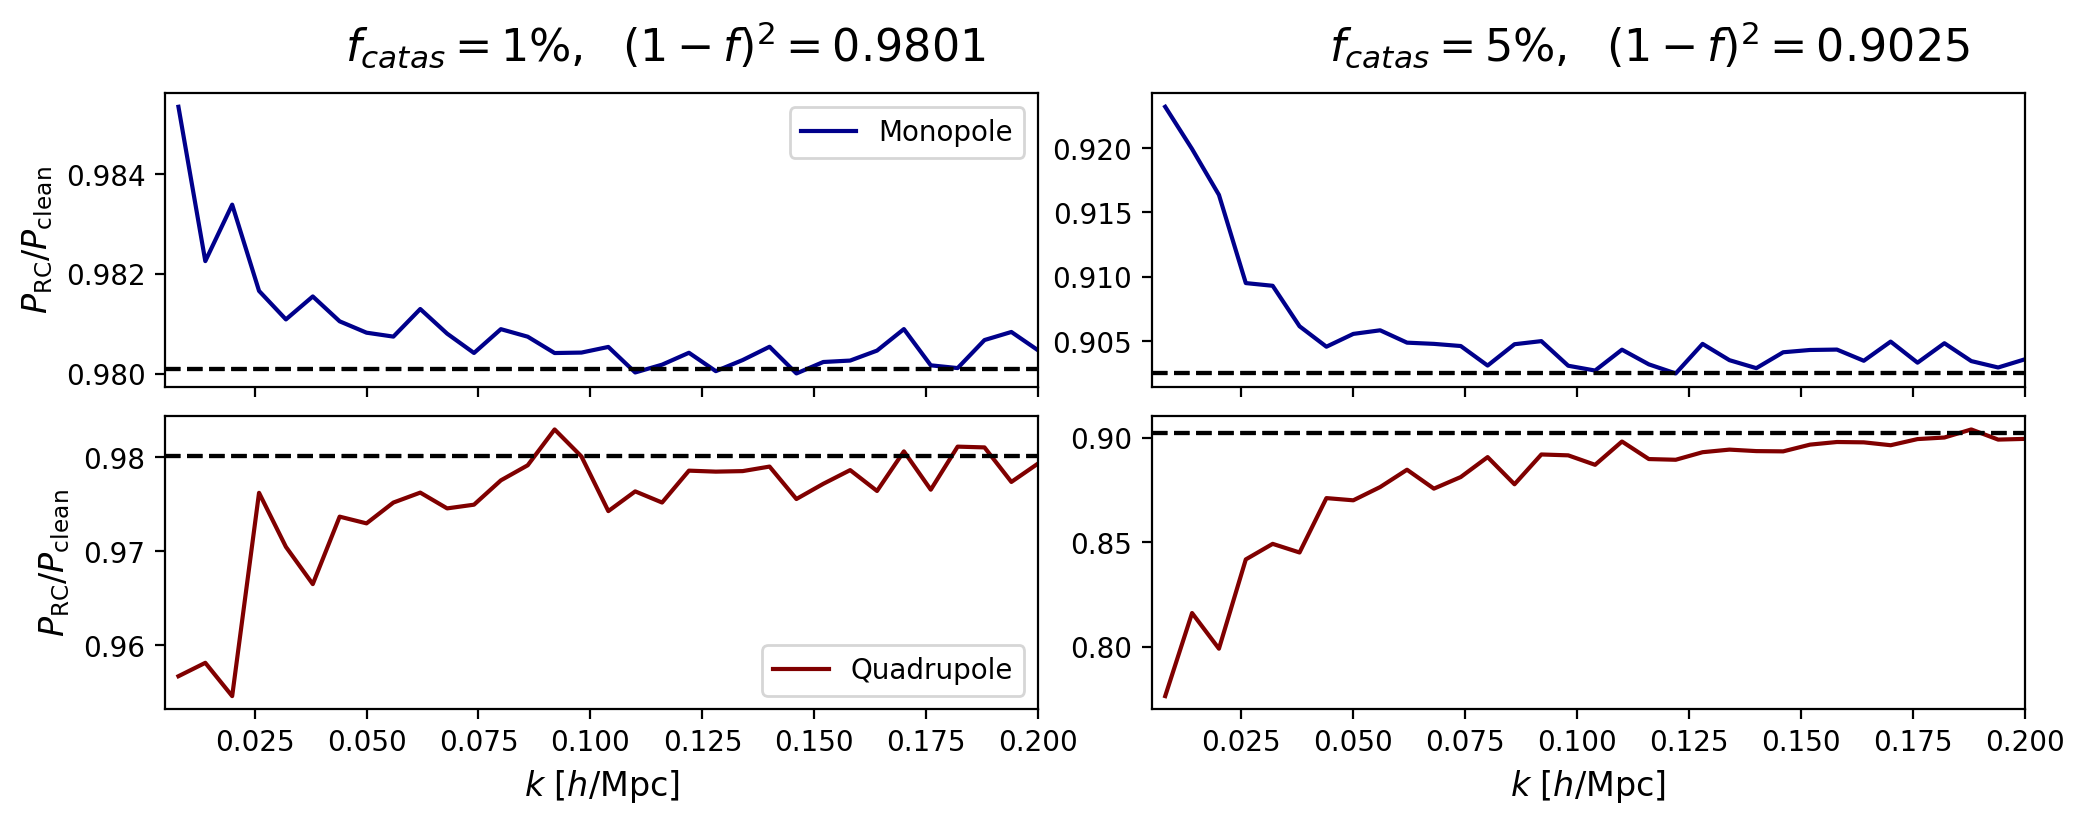

In [58]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize = (12, 4))
fig.subplots_adjust(wspace=0.13)
fig.subplots_adjust(hspace=0.1)

colors = ['darkblue', 'maroon']
lss = ['-', '--']

for z, redshift in enumerate([1.0]):
    Pkobs   = []
    labels  = ['Monopole','Quadrupole']
    for t,r_pk in enumerate(['RSD','1%CATAS','5%CATAS']):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload('fiducial', 'fiducial', r_pk, redshift)
        Pkobs.append([pk0, pk2])
        if t == 0:
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]
            print(k_ev)
    for t in [1,2]:
        k = t-1
        for ell, i in zip(['monopole','quadrupole'],range(2)):
            error = np.sqrt(Pkobs[t][i][1]**2+Pkobs[0][i][1]**2)
            axs[i][k].plot(k_ev, (Pkobs[t][i][0]/Pkobs[0][i][0]), color = colors[i], linestyle=lss[z],label=labels[i])  
            # axs[i][k].plot(k_ev, (Pkobs[0][i][0]-Pkobs[t][i][0])/Pkobs[0][i][0], color = colors[i], linestyle=lss[z],label=labels[i])           

            # axs[i][k].fill_between(k_ev,  (Pkobs[t][i][0]-error/rsf)/Pkobs[0][i][0],
            #                     (Pkobs[t][i][0]+error/rsf)/Pkobs[0][i][0], alpha=0.6, color='grey')              
            axs[1][k].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
            axs[i][0].set_ylabel(r'$P_{\text{RC}} / P_{\text{clean}}$', fontsize = label_fontsize)
            axs[i][0].axhline((1-0.01)**2, color='k', linestyle='--', alpha=1.0)
            axs[i][1].axhline((1-0.05)**2, color='k', linestyle='--', alpha=1.0)
            axs[i][0].legend()
            axs[i][k].set_xlim([0.005,0.20])

# axs[0][0].set_ylim([(1-0.01)**2*0.91, (1-0.01)**2*1.09,])
# axs[1][0].set_ylim([(1-0.01)**2*0.91, (1-0.01)**2*1.09,])
# axs[0][1].set_ylim([(1-0.05)**2*0.9, (1-0.05)**2*1.1,])
# axs[1][1].set_ylim([(1-0.05)**2*0.9, (1-0.05)**2*1.1,])

# line1= Line2D([0], [0], label='z=0.5', color='black', linestyle= '-')
# line2 = Line2D([0], [0], label='z=1.0', color='black', linestyle= '-')
# leg1 = axs[0][0].legend(handles=[line2], loc=4, ncols=2, fontsize=legend_fontsize)
# leg1.get_frame().set_linewidth(0.0)
# leg1 = axs[0][1].legend(handles=[line1,line2], loc=1, ncols=2, fontsize=legend_fontsize)
# leg1.get_frame().set_linewidth(0.0)

plt.figtext(0.20, 0.92, r'$f_{catas}=1\%, \ \ (1-f)^2 = 0.9801$', fontsize=legend_fontsize)
plt.figtext(0.61, 0.92, r'$f_{catas}=5\%, \ \ (1-f)^2 = 0.9025$', fontsize=legend_fontsize)
plt.show()

/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/5%CATAS_z1.0/fiducial_199_z1.0.pk


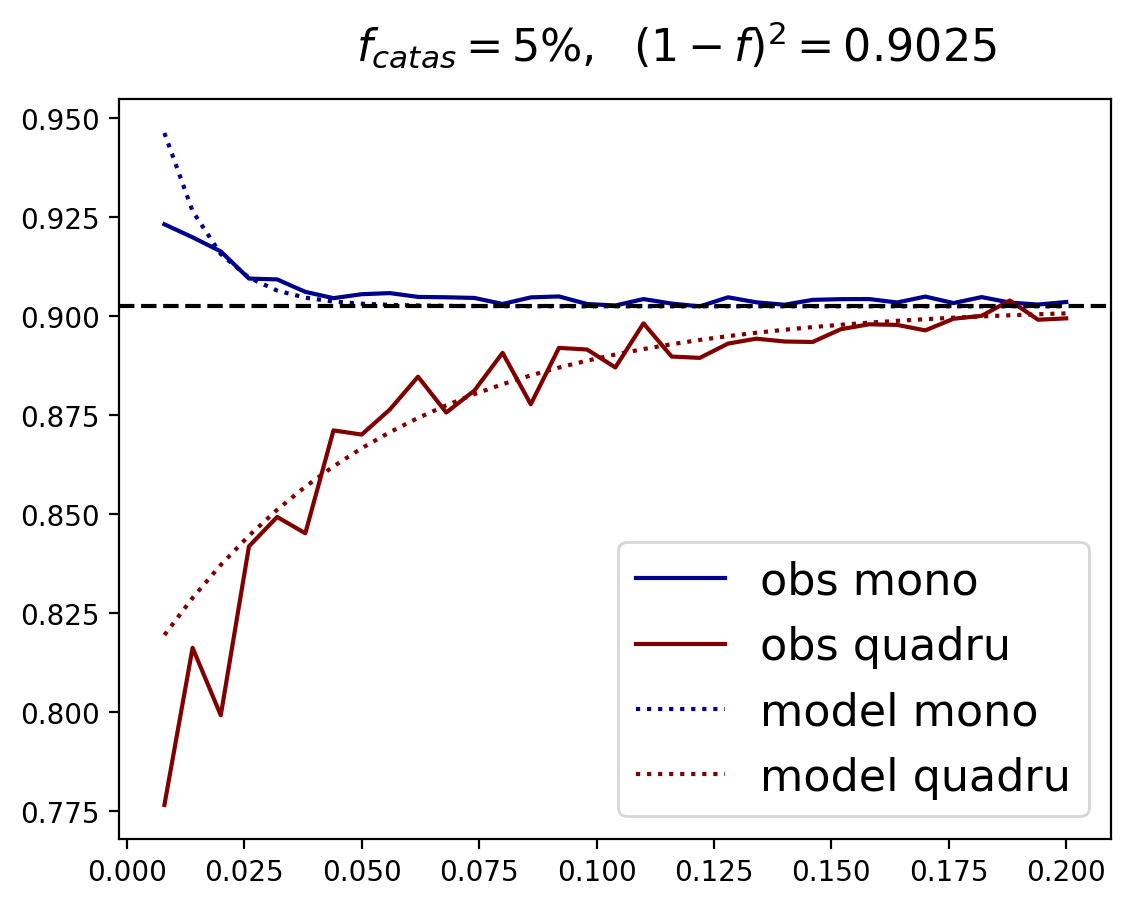

In [99]:
k_c = 0.05
# x = np.linspace(0, 0.2, 100)
factor  = (1-0.05)**2
# 1-(1-fc)^2
# plt.axhline(y=1, color = 'black', ls= '--')
# plt.axhline(y=2*factor-1, color = 'black', ls= '--')
# plt.plot(x, 1-erf(x/0.02)*(1-factor))
# plt.plot(x, 2*factor-1+erf(x/0.06)*(1-factor))

[k_ev, pk0, pk2, cov] = Pkload('fiducial', 'fiducial','RSD', 1.0)
[k_ev, pk0_catas, pk2_catas, cov] = Pkload('fiducial', 'fiducial','5%CATAS', 1.0)

plt.plot(k_ev, pk0_catas[0]/(pk0[0]), color = 'darkblue',label='obs mono')
plt.plot(k_ev, pk2_catas[0]/(pk2[0]), color = 'maroon',label='obs quadru')

mono_factor = (1-(1-np.exp((-k_ev/0.01)))*(1-factor))
quadru_factor = (2*factor-1+(1-np.exp((-k_ev/0.05)))*(1-factor))
plt.plot(k_ev, mono_factor,color='darkblue',ls=':',label='model mono')
plt.plot(k_ev, quadru_factor,color='maroon',ls=':',label='model quadru')

plt.axhline((1-0.05)**2, color='k', linestyle='--', alpha=1.0)
plt.legend(loc=4,fontsize=legend_fontsize)
plt.figtext(0.31, 0.92, r'$f_{catas}=5\%, \ \ (1-f)^2 = 0.9025$', fontsize=legend_fontsize)

plt.show()